测试一下Logit回顾

# 案例分析

探讨经皮内镜下腰椎间盘摘除术治疗腰椎间盘突出疗效不佳的主要影响因素，纳入146例治疗效果“不佳”（记录为1）的患者，278例治疗效果“良好”（记录为0）的患者，并收集其余变量信息。其余变量及编码为性别(gender：0=女，1=男)、年龄(age，0=60岁以下，1=60岁及以上)、手术时间(time, min)、突出部位(part, 1=单侧，2=中央，3=极外侧)、突出分类(class, 1=膨出型，2=突出型，3=脱垂型)、Modic改变(modic, 1=I级，2=II级，3=III级)、是否钙化(cal, 0=未钙化，1=钙化)、矢状径(d, cm)、退变级别(level, 1=I-III级，2=IV级，3=V级)。部分数据见图1。本文案例可从“附件下载”处下载。

In [2]:
# 导入数据
library(readr)
data <- read_csv("./data/logit.csv")
head(data)

# gender age time part class modic cal d    level predict
# 1 0      0   110  2    2     0     1   2.90 1     0      
# 2 0      0    40  2    2     0     0   3.88 2     1      
# 3 0      0    80  1    2     0     0   6.60 2     0      
# 4 0      0    40  1    2     0     0   6.60 2     0      
# 5 1      0    45  1    2     0     0   7.13 2     0      
# 6 1      0    45  1    2     0     0   7.13 2     0

Rows: 424 Columns: 10
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (10): gender, age, time, part, class, modic, cal, d, level, predict

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


gender,age,time,part,class,modic,cal,d,level,predict
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,110,2,2,0,1,2.90,1,0
0,0,40,2,2,0,0,3.88,2,1
0,0,80,1,2,0,0,6.60,2,0
0,0,40,1,2,0,0,6.60,2,0
1,0,45,1,2,0,0,7.13,2,0
1,0,45,1,2,0,0,7.13,2,0


In [ ]:
library(tidyverse)
data %>% glimpse()

In [ ]:
data <- data %>%
  mutate(
    gender = factor(gender),
    age = factor(age),
    part = factor(part),
    class = factor(class),
    modic = factor(modic),
    cal = factor(cal),
    level = factor(level)
  )
data %>% glimpse()

Rows: 424
Columns: 10
$ gender  <fct> 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,~
$ age     <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,~
$ time    <dbl> 110, 40, 80, 40, 45, 45, 60, 45, 50, 50, 50, 50, 50, 50, 50, 5~
$ part    <fct> 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,~
$ class   <fct> 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,~
$ modic   <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1,~
$ cal     <fct> 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,~
$ d       <dbl> 2.90, 3.88, 6.60, 6.60, 7.13, 7.13, 8.90, 8.90, 4.95, 4.95, 6.~
$ level   <fct> 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 3, 3, 2, 2, 2, 2, 2,~
$ predict <dbl> 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,~


In [ ]:
library(modelsummary)
datasummary_skim(data)


+---------+--------+--------------+------+------+------+--------+-------+---------------------------------------------------------------+
|         | Unique | Missing Pct. | Mean | SD   | Min  | Median | Max   | Histogram                                                     |
+=========+========+==============+======+======+======+========+=======+===============================================================+
| time    | 29     | 0            | 95.5 | 27.7 | 40.0 | 90.0   | 200.0 | ![](tinytable_assets/idb1qohkbiw05b50d4lx2f.png){ height=16 } |
+---------+--------+--------------+------+------+------+--------+-------+---------------------------------------------------------------+
| d       | 167    | 0            | 6.6  | 1.9  | 2.2  | 6.6    | 13.1  | ![](tinytable_assets/id7b81z8x3fuhqyyu846f9.png){ height=16 } |
+---------+--------+--------------+------+------+------+--------+-------+---------------------------------------------------------------+
| predict | 2      | 0           

## 适用条件判断

条件4

In [ ]:
table(data$predict)

# 0   1 
# 278 146


  0   1 
278 146 

In [ ]:
# 筛选类型为因子的列
col_names <- names(data)[sapply(data, is.factor)]
# 遍历绘制列联表
for (col in col_names) {
  print(col)
  print(table(data$predict, data[[col]]))
}

# [1] "gender"
   
#       0   1
#   0 106 172
#   1  60  86
# [1] "age"
   
#       0   1
#   0 237  41
#   1  91  55
# [1] "part"
   
#       1   2   3
#   0 171  91  16
#   1  61  68  17
# [1] "class"
   
#       1   2   3
#   0  27 161  90
#   1  16  79  51
# [1] "modic"
   
#       0   1   2
#   0 166  32  80
#   1  82  16  48
# [1] "cal"
   
#       0   1
#   0 177 101
#   1 115  31
# [1] "level"
   
#       1   2   3
#   0  65 200  13
#   1  30  92  24

[1] "gender"
   
      0   1
  0 106 172
  1  60  86
[1] "age"
   
      0   1
  0 237  41
  1  91  55
[1] "part"
   
      1   2   3
  0 171  91  16
  1  61  68  17
[1] "class"
   
      1   2   3
  0  27 161  90
  1  16  79  51
[1] "modic"
   
      0   1   2
  0 166  32  80
  1  82  16  48
[1] "cal"
   
      0   1
  0 177 101
  1 115  31
[1] "level"
   
      1   2   3
  0  65 200  13
  1  30  92  24


In [ ]:
# 获得列数
col <- ncol(data)
col

[1] 10

# 变量筛选

In [ ]:
# 以单因素分析为基础
library(broom)
# 创建df存储p值与保留与否结果
df_select <- data.frame(
  col_name = character(),
  p_value = numeric(),
  keep = logical(),
  stringsAsFactors = FALSE
)
# 阈值p值为0.05
# 其实太紧了，应该用0.1-0.2的
p_limit <- 0.05
for (i in 1:(ncol(data) - 1)) {
  col_name <- names(data)[i]
  print(col_name)

  # 使用glm函数进行逻辑回归
  model <- glm(predict ~ data[[col_name]], data = data, family = binomial)

  # 打印模型摘要
  print(tidy(model))

  # 提取p值
  p_value <- tidy(model)$p.value[2]  # 获取第二个系数的p值

  # 判断是否保留该变量
  keep <- p_value < p_limit

  # 将结果添加到df_select中
  df_select <- rbind(df_select, data.frame(
    col_name = col_name,
    p_value = p_value,
    keep = keep,
    stringsAsFactors = FALSE
  ))
}

# 打印df_select
print(df_select)

[1] "gender"
# A tibble: 2 x 5
  term              estimate std.error statistic  p.value
  <chr>                <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)         -0.569     0.162    -3.52  0.000427
2 data[[col_name]]1   -0.124     0.209    -0.594 0.552   
[1] "age"
# A tibble: 2 x 5
  term              estimate std.error statistic  p.value
  <chr>                <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)         -0.957     0.123     -7.76 8.37e-15
2 data[[col_name]]1    1.25      0.240      5.20 1.95e- 7
[1] "time"
# A tibble: 2 x 5
  term             estimate std.error statistic  p.value
  <chr>               <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)      -1.32      0.371       -3.57 0.000364
2 data[[col_name]]  0.00706   0.00368      1.92 0.0549  
[1] "part"
# A tibble: 3 x 5
  term              estimate std.error statistic  p.value
  <chr>                <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)         -1.03      0.149     -6.91 4.79e-12
2 data[[col_name]

In [ ]:
# 建立新的回归模型
fit <- glm(predict ~ age + part + cal + d + level,
           data = data,
           family = binomial)

# 共线性诊断
library(car)
vif(fit)  # 计算VIF

# GVIF     Df GVIF^(1/(2*Df))
# age   1.118650 1  1.057663       
# part  1.064996 2  1.015867       
# cal   1.022615 1  1.011244       
# d     1.029577 1  1.014681       
# level 1.156238 2  1.036959

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some




,GVIF,Df,GVIF^(1/(2*Df))
age,1.118650,1,1.057663
part,1.064996,2,1.015867
cal,1.022615,1,1.011244
d,1.029577,1,1.014681
level,1.156238,2,1.036959


In [ ]:
# 计算 Cook 距离
cook <- cooks.distance(fit)

# 显示 Cook 距离 > 0.5 的个案编号和 Cook 值
outliers <- which(cook > 0.5)
cook_outliers <- cook[outliers]
print(data.frame(case = outliers, cook_distance = cook_outliers))

# 显示最大 Cook 距离
cat("Max Cook Distance:", max(cook), "\n")

# [1] case          cook_distance
# <0 rows> (or 0-length row.names)
# Max Cook Distance: 0.03121143

[1] case          cook_distance
<0 rows> (or 0-length row.names)
Max Cook Distance: 0.03121143 


In [ ]:
summary(fit)

# Call:
# glm(formula = predict ~ age + part + cal + d + level, family = binomial, 
#     data = data)

# Coefficients:
#             Estimate Std. Error z value Pr(>|z|)    
# (Intercept)  0.15191    0.46180   0.329 0.742193    
# age1         1.02228    0.26823   3.811 0.000138 ***
# part2        0.73754    0.23558   3.131 0.001744 ** 
# part3        0.75772    0.42799   1.770 0.076660 .  
# cal1        -0.55572    0.25174  -2.208 0.027277 *  
# d           -0.17912    0.06201  -2.889 0.003869 ** 
# level2      -0.23449    0.27919  -0.840 0.400965    
# level3       0.77834    0.46732   1.666 0.095802 .  
# ---
# Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# (Dispersion parameter for binomial family taken to be 1)

#     Null deviance: 546.00  on 423  degrees of freedom
# Residual deviance: 481.88  on 416  degrees of freedom
# AIC: 497.88

# Number of Fisher Scoring iterations: 4


Call:
glm(formula = predict ~ age + part + cal + d + level, family = binomial, 
    data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.15191    0.46180   0.329 0.742193    
age1         1.02228    0.26823   3.811 0.000138 ***
part2        0.73754    0.23558   3.131 0.001744 ** 
part3        0.75772    0.42799   1.770 0.076660 .  
cal1        -0.55572    0.25174  -2.208 0.027277 *  
d           -0.17912    0.06201  -2.889 0.003869 ** 
level2      -0.23449    0.27919  -0.840 0.400965    
level3       0.77834    0.46732   1.666 0.095802 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 546.00  on 423  degrees of freedom
Residual deviance: 481.88  on 416  degrees of freedom
AIC: 497.88

Number of Fisher Scoring iterations: 4


In [ ]:
tidy(fit)

# term        estimate   std.error  statistic  p.value    
# 1 (Intercept)  0.1519091 0.46179928  0.3289505 0.742193138
# 2 age1         1.0222803 0.26822843  3.8112301 0.000138277
# 3 part2        0.7375358 0.23557713  3.1307615 0.001743537
# 4 part3        0.7577214 0.42799358  1.7704036 0.076659924
# 5 cal1        -0.5557158 0.25173706 -2.2075247 0.027277423
# 6 d           -0.1791188 0.06200841 -2.8886216 0.003869344
# 7 level2      -0.2344920 0.27919093 -0.8398983 0.400965429
# 8 level3       0.7783398 0.46731506  1.6655568 0.095801712

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.1519091,0.46179928,0.3289505,0.742193138
age1,1.0222803,0.26822843,3.8112301,0.000138277
part2,0.7375358,0.23557713,3.1307615,0.001743537
part3,0.7577214,0.42799358,1.7704036,0.076659924
cal1,-0.5557158,0.25173706,-2.2075247,0.027277423
d,-0.1791188,0.06200841,-2.8886216,0.003869344
level2,-0.2344920,0.27919093,-0.8398983,0.400965429
level3,0.7783398,0.46731506,1.6655568,0.095801712


In [ ]:
confint(fit)

# 2.5 %       97.5 %     
# (Intercept) -0.75380687  1.06083517
# age1         0.49772078  1.55155685
# part2        0.27756349  1.20249682
# part3       -0.08938101  1.59859053
# cal1        -1.05884968 -0.06941445
# d           -0.30349224 -0.05986961
# level2      -0.77825449  0.31928684
# level3      -0.13121716  1.70948219

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-0.75380687,1.06083517
age1,0.49772078,1.55155685
part2,0.27756349,1.20249682
part3,-0.08938101,1.59859053
cal1,-1.05884968,-0.06941445
d,-0.30349224,-0.05986961
level2,-0.77825449,0.31928684
level3,-0.13121716,1.70948219


In [ ]:
# 计算OR
exp(coef(fit))

# (Intercept)        age1       part2       part3        cal1           d 
#   1.1640544   2.7795256   2.0907771   2.1334095   0.5736615   0.8360066 
#      level2      level3 
#   0.7909726   2.1778536

(Intercept)        age1       part2       part3        cal1           d 
  1.1640544   2.7795256   2.0907771   2.1334095   0.5736615   0.8360066 
     level2      level3 
  0.7909726   2.1778536

In [ ]:
# 计算OR的置信区间
exp(confint(fit))

# 2.5 %     97.5 %   
# (Intercept) 0.4705717 2.8887826
# age1        1.6449678 4.7188110
# part2       1.3199099 3.3284170
# part3       0.9144971 4.9460562
# cal1        0.3468546 0.9329399
# d           0.7382356 0.9418873
# level2      0.4592069 1.3761460
# level3      0.8770273 5.5260993

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.4705717,2.8887826
age1,1.6449678,4.7188110
part2,1.3199099,3.3284170
part3,0.9144971,4.9460562
cal1,0.3468546,0.9329399
d,0.7382356,0.9418873
level2,0.4592069,1.3761460
level3,0.8770273,5.5260993


In [ ]:
# 手动构造似然比检验
# 计算对数似然值
loglik_full <- logLik(fit)

# 计算空模型的对数似然值
fit_null <- glm(predict ~ 1, data = data, family = binomial)
loglik_null <- logLik(fit_null)

# 计算似然比检验的统计量
lr_statistic <- -2 * (loglik_null - loglik_full)

# 计算p值
p_value <- pchisq(lr_statistic, df = ncol(data) - 1, lower.tail = FALSE)

cat("Likelihood Ratio Statistic:", lr_statistic, "\n")
cat("p-value:", p_value, "\n")

if (p_value < 0.05) {
  cat("The model is statistically significant.\n")
} else {
  cat("The model is not statistically significant.\n")
}

# Likelihood Ratio Statistic: 64.12515 
# p-value: 2.134141e-10 
# The model is statistically significant.

Likelihood Ratio Statistic: 64.12515 
p-value: 2.134141e-10 
The model is statistically significant.


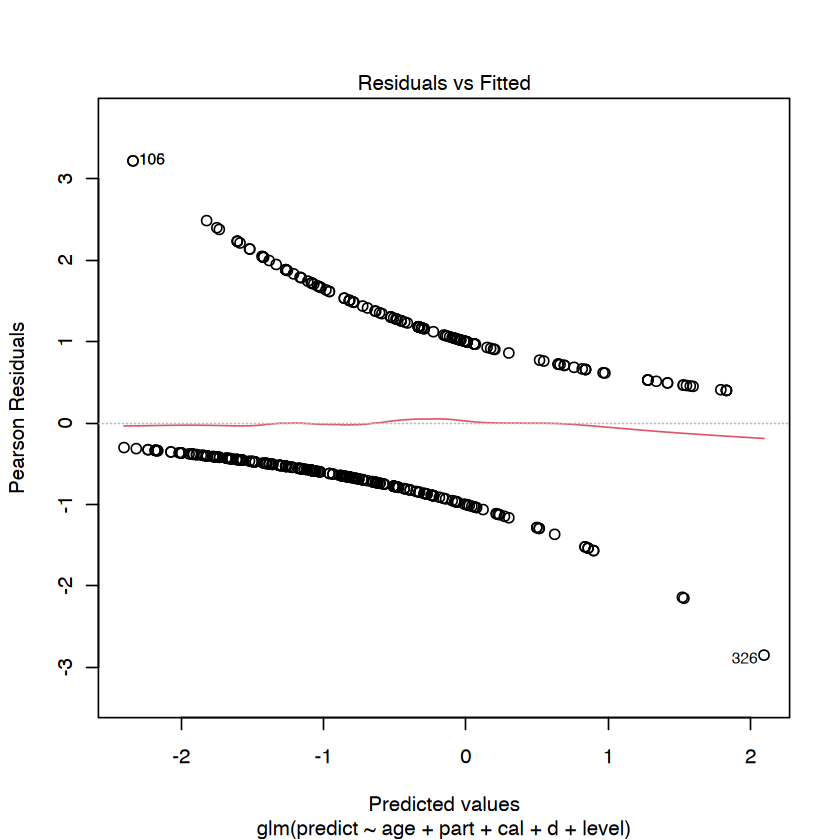

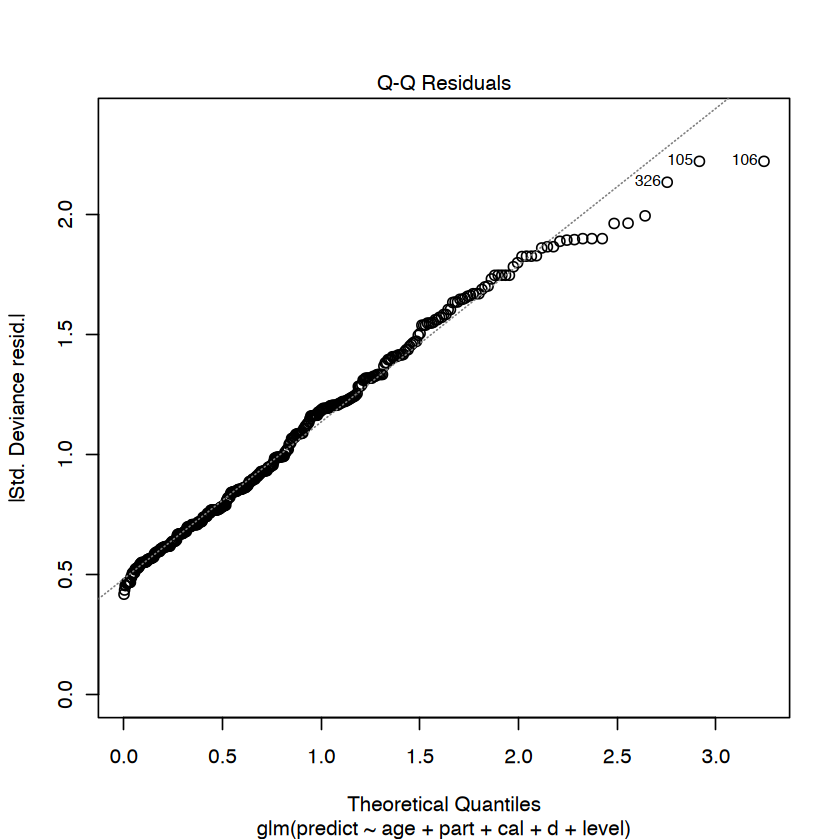

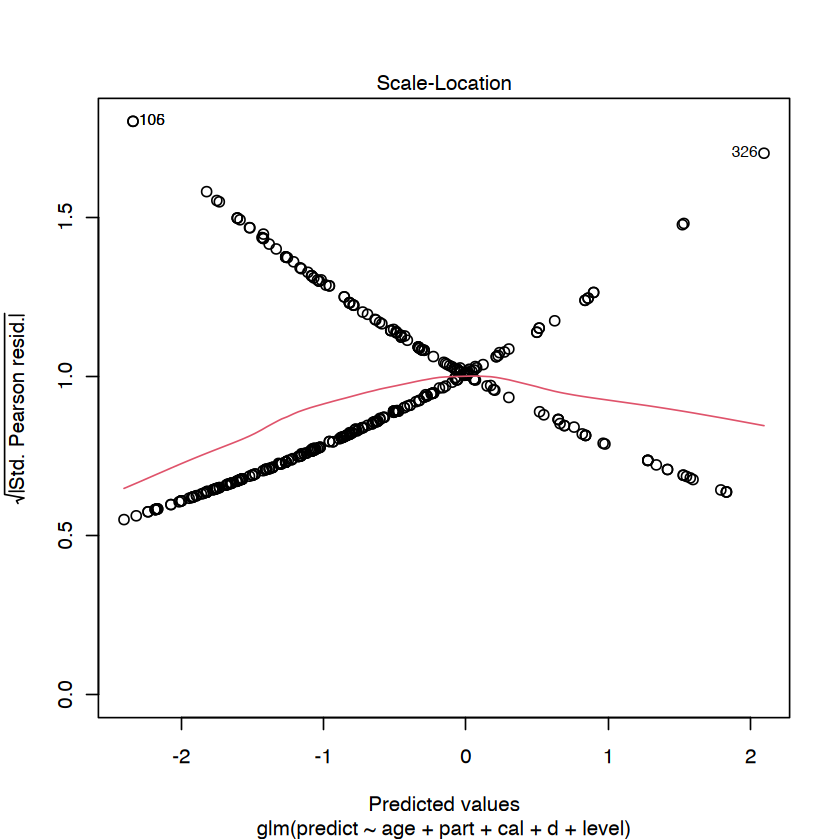

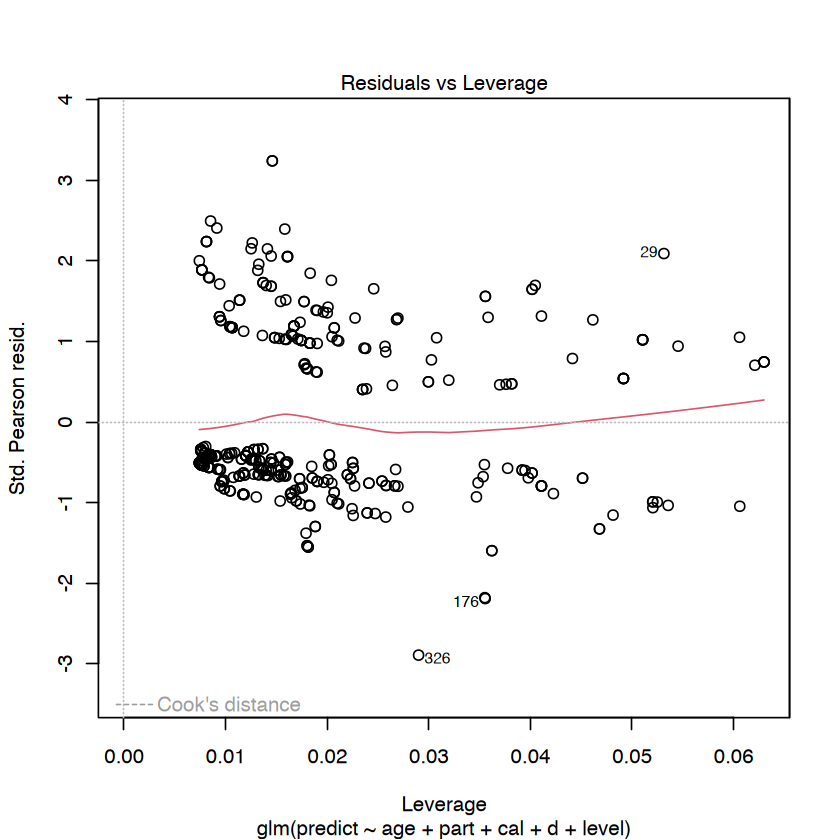

In [ ]:
plot(fit)

In [ ]:
confint(fit)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-0.75380687,1.06083517
age1,0.49772078,1.55155685
part2,0.27756349,1.20249682
part3,-0.08938101,1.59859053
cal1,-1.05884968,-0.06941445
d,-0.30349224,-0.05986961
level2,-0.77825449,0.31928684
level3,-0.13121716,1.70948219


In [ ]:
data_forest 

term,conf.low,conf.high
<chr>,<dbl>,<dbl>
(Intercept),0.4705717,2.8887826
age1,1.6449678,4.7188110
part2,1.3199099,3.3284170
part3,0.9144971,4.9460562
cal1,0.3468546,0.9329399
d,0.7382356,0.9418873
level2,0.4592069,1.3761460
level3,0.8770273,5.5260993


In [ ]:
tidy(fit)$estimate

[1]  0.1519091  1.0222803  0.7375358  0.7577214 -0.5557158 -0.1791188 -0.2344920
[8]  0.7783398

Waiting for profiling to be done...



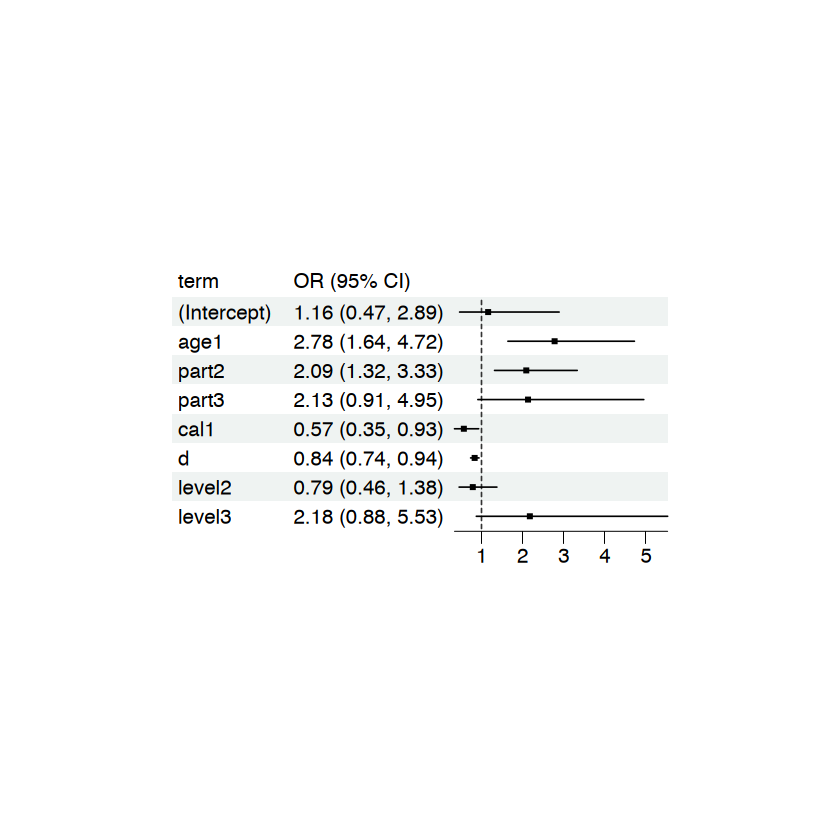

In [ ]:
data_forest <- exp(confint(fit)) %>%
  as.data.frame() %>%
  rownames_to_column(var = "term") %>%
  rename(
    conf.low = `2.5 %`,
    conf.high = `97.5 %`
  ) %>%
  mutate(
    estimate = exp(tidy(fit)$estimate),
    `OR (95% CI)` = paste0(
      round(estimate, 2), " (",
      round(conf.low, 2), ", ",
      round(conf.high, 2), ")"
    ),
    `                                  ` = ""  # 添加空白列
  )

# 绘制森林图
library(forestploter)
forest(
  data_forest[, c("term", "OR (95% CI)", "                                  ")],
  est = data_forest$estimate,
  lower = data_forest$conf.low,
  upper = data_forest$conf.high,
  ci_column = 3,                # 空白列的位置（第3列绘制CI条）
  ref_line = 1
)

In [ ]:
# 手动计算准R2
loglik_full <- logLik(fit)
loglik_null <- logLik(fit_null)

# 计算准R2
pseudo_r2 <- 1 - (loglik_full / loglik_null)
cat("Pseudo R2:", pseudo_r2, "\n")

# Pseudo R2: 0.1174446 

Pseudo R2: 0.1174446 


In [ ]:
# 使用caret包实现混淆矩阵
library(caret)
confusionMatrix(
  as.factor(data$predict),
  as.factor(ifelse(fitted(fit) > 0.5, 1, 0))
)

# Confusion Matrix and Statistics

#           Reference
# Prediction   0   1
#          0 249  29
#          1 100  46
                                          
#                Accuracy : 0.6958          
#                  95% CI : (0.6495, 0.7392)
#     No Information Rate : 0.8231          
#     P-Value [Acc > NIR] : 1               
                                          
#                   Kappa : 0.2383          
                                          
#  Mcnemar's Test P-Value : 7.131e-10       
                                          
#             Sensitivity : 0.7135          
#             Specificity : 0.6133          
#          Pos Pred Value : 0.8957          
#          Neg Pred Value : 0.3151          
#              Prevalence : 0.8231          
#          Detection Rate : 0.5873          
#    Detection Prevalence : 0.6557          
#       Balanced Accuracy : 0.6634          
                                          
#        'Positive' Class : 0

Loading required package: lattice


Attaching package: 'caret'


The following objects are masked from 'package:yardstick':

    precision, recall, sensitivity, specificity


The following object is masked from 'package:purrr':

    lift




Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 249  29
         1 100  46
                                          
               Accuracy : 0.6958          
                 95% CI : (0.6495, 0.7392)
    No Information Rate : 0.8231          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2383          
                                          
 Mcnemar's Test P-Value : 7.131e-10       
                                          
            Sensitivity : 0.7135          
            Specificity : 0.6133          
         Pos Pred Value : 0.8957          
         Neg Pred Value : 0.3151          
             Prevalence : 0.8231          
         Detection Rate : 0.5873          
   Detection Prevalence : 0.6557          
      Balanced Accuracy : 0.6634          
                                          
       'Positive' Class : 0               
                              

Setting levels: control = 0, case = 1

Setting direction: controls < cases



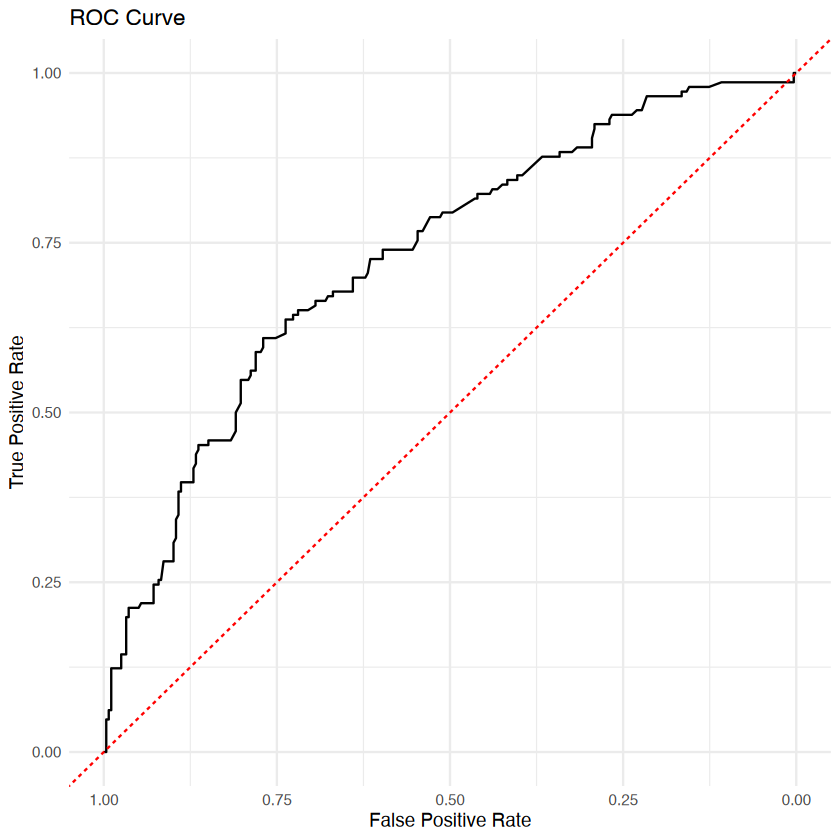

In [ ]:
# 使用ggplot2风格绘制ROC曲线
library(ggplot2)
library(pROC)
roc_curve <- roc(data$predict, fitted(fit))
ggroc(roc_curve) +
  ggtitle("ROC Curve") +
  xlab("False Positive Rate") +
  ylab("True Positive Rate") +
  theme_minimal() +
  geom_abline(slope = 1, intercept = 1, linetype = "dashed", color = "red")

In [ ]:
# 计算AUC
auc_value <- auc(roc_curve)
cat("AUC:", auc_value, "\n")

# AUC: 0.7284665 


AUC: 0.7284665 


In [ ]:
# 计算最佳截断值
best_threshold <- coords(roc_curve, "best")
cat("Best Threshold:", best_threshold$threshold, "\n")

# Best Threshold: 0.3799988

Best Threshold: 0.3799988 


In [ ]:
# 再用最佳截断值计算混淆矩阵
confusionMatrix(
  as.factor(data$predict),
  as.factor(ifelse(fitted(fit) > best_threshold$threshold, 1, 0))
)

# Confusion Matrix and Statistics

#           Reference
# Prediction   0   1
#          0 214  64
#          1  57  89
                                          
#                Accuracy : 0.7146          
#                  95% CI : (0.6691, 0.7572)
#     No Information Rate : 0.6392          
#     P-Value [Acc > NIR] : 0.0006051       
                                          
#                   Kappa : 0.3751          
                                          
#  Mcnemar's Test P-Value : 0.5854409       
                                          
#             Sensitivity : 0.7897          
#             Specificity : 0.5817          
#          Pos Pred Value : 0.7698          
#          Neg Pred Value : 0.6096          
#              Prevalence : 0.6392          
#          Detection Rate : 0.5047          
#    Detection Prevalence : 0.6557          
#       Balanced Accuracy : 0.6857          
                                          
#        'Positive' Class : 0

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 214  64
         1  57  89
                                          
               Accuracy : 0.7146          
                 95% CI : (0.6691, 0.7572)
    No Information Rate : 0.6392          
    P-Value [Acc > NIR] : 0.0006051       
                                          
                  Kappa : 0.3751          
                                          
 Mcnemar's Test P-Value : 0.5854409       
                                          
            Sensitivity : 0.7897          
            Specificity : 0.5817          
         Pos Pred Value : 0.7698          
         Neg Pred Value : 0.6096          
             Prevalence : 0.6392          
         Detection Rate : 0.5047          
   Detection Prevalence : 0.6557          
      Balanced Accuracy : 0.6857          
                                          
       'Positive' Class : 0               
                              

In [ ]:
##拟合优度检验##
library(ResourceSelection)
hoslem.test(fit$y, fitted(fit), g = 10)

# Hosmer and Lemeshow goodness of fit (GOF) test

# data:  fit$y, fitted(fit)
# X-squared = 5.8238, df = 8, p-value = 0.667

ResourceSelection 0.3-6 	 2023-06-27




	Hosmer and Lemeshow goodness of fit (GOF) test

data:  fit$y, fitted(fit)
X-squared = 5.8238, df = 8, p-value = 0.667


In [ ]:
reg_test <- lm(data = mtcars, formula = mpg ~ wt + hp + qsec + am)
vif(reg_test)

wt       hp     qsec       am 
3.964515 4.922129 3.216021 2.541527

In [ ]:
# 所有连续变量正态检验
vars_num <- names(data)[sapply(data, is.numeric)]
vars_notnorm <- c()
for (var in vars_num) {
  print(var)
  print(shapiro.test(data[[var]]))
  if (shapiro.test(data[[var]])$p.value < 0.05) {
    vars_notnorm <- c(vars_notnorm, var)
  }
}

print(vars_notnorm)

# [1] "time"

# 	Shapiro-Wilk normality test

# data:  data[[var]]
# W = 0.96852, p-value = 6.572e-08

# [1] "d"

# 	Shapiro-Wilk normality test

# data:  data[[var]]
# W = 0.9782, p-value = 5.415e-06

# [1] "predict"

# 	Shapiro-Wilk normality test

# data:  data[[var]]
# W = 0.60028, p-value < 2.2e-16

# [1] "time"    "d"       "predict"

[1] "time"

	Shapiro-Wilk normality test

data:  data[[var]]
W = 0.96852, p-value = 6.572e-08

[1] "d"

	Shapiro-Wilk normality test

data:  data[[var]]
W = 0.9782, p-value = 5.415e-06

[1] "predict"

	Shapiro-Wilk normality test

data:  data[[var]]
W = 0.60028, p-value < 2.2e-16

[1] "time"    "d"       "predict"


In [ ]:
# 绘制table1
library(tableone)

# 提取变量名
vars <- names(data[-ncol(data)])  # 排除最后一列（predict）

# 指定分类变量名
cat_vars <- names(data[-ncol(data)])[sapply(data, is.factor)]

In [ ]:
table <- CreateTableOne(
  vars = vars,       #条件1
  factorVars = cat_vars, #条件2
  data = data,  #源数据
  addOverall = TRUE
)  #增加overall列

In [ ]:
table1 <- print(
  table,  #构建的table函数（包括条件1.2）
  showAllLevels = TRUE, #显示所有变量
  nonnormal = vars_notnorm, #非正态变量
) #条件3

# level Overall              
#   n                           424                
#   gender (%)          0       166 (39.2)         
#                       1       258 (60.8)         
#   age (%)             0       328 (77.4)         
#                       1        96 (22.6)         
#   time (median [IQR])       90.00 [80.00, 110.00]
#   part (%)            1       232 (54.7)         
#                       2       159 (37.5)         
#                       3        33 ( 7.8)         
#   class (%)           1        43 (10.1)         
#                       2       240 (56.6)         
#                       3       141 (33.3)         
#   modic (%)           0       248 (58.5)         
#                       1        48 (11.3)         
#                       2       128 (30.2)         
#   cal (%)             0       292 (68.9)         
#                       1       132 (31.1)         
#   d (median [IQR])           6.60 [5.02, 7.75]   
#   level (%)           1        95 (22.4)         
#                       2       292 (68.9)         
#                       3        37 ( 8.7)

                     
                      level Overall              
  n                           424                
  gender (%)          0       166 (39.2)         
                      1       258 (60.8)         
  age (%)             0       328 (77.4)         
                      1        96 (22.6)         
  time (median [IQR])       90.00 [80.00, 110.00]
  part (%)            1       232 (54.7)         
                      2       159 (37.5)         
                      3        33 ( 7.8)         
  class (%)           1        43 (10.1)         
                      2       240 (56.6)         
                      3       141 (33.3)         
  modic (%)           0       248 (58.5)         
                      1        48 (11.3)         
                      2       128 (30.2)         
  cal (%)             0       292 (68.9)         
                      1       132 (31.1)         
  d (median [IQR])           6.60 [5.02, 7.75]   
  level (%)           1     

In [ ]:
table <- CreateTableOne(
  vars = vars, # 条件1
  factorVars = cat_vars,  # 条件2
  strata = "predict", # 条件4
  data = data, # 原始数据
  addOverall = TRUE
)  # 条件6加入overall

table1 <- print(
  table, # 构建的table函数（带条件1.2.3）
  nonnormal = vars_notnorm,  # 条件4
  #exact = exactvars,#条件5
  catDigits = 2, contDigits = 3, pDigits = 4, #附加条件
  showAllLevels = TRUE, # 显示所有变量
  quote = FALSE, # 不显示引号
  noSpaces = TRUE, # 删除用于对齐的空格
  printToggle = TRUE
) # 展示输出结果

# Stratified by predict
#                       level Overall                  0                       
#   n                         424                      278                     
#   gender (%)          0     166 (39.15)              106 (38.13)             
#                       1     258 (60.85)              172 (61.87)             
#   age (%)             0     328 (77.36)              237 (85.25)             
#                       1     96 (22.64)               41 (14.75)              
#   time (median [IQR])       90.000 [80.000, 110.000] 90.000 [75.000, 110.000]
#   part (%)            1     232 (54.72)              171 (61.51)             
#                       2     159 (37.50)              91 (32.73)              
#                       3     33 (7.78)                16 (5.76)               
#   class (%)           1     43 (10.14)               27 (9.71)               
#                       2     240 (56.60)              161 (57.91)             
#                       3     141 (33.25)              90 (32.37)              
#   modic (%)           0     248 (58.49)              166 (59.71)             
#                       1     48 (11.32)               32 (11.51)              
#                       2     128 (30.19)              80 (28.78)              
#   cal (%)             0     292 (68.87)              177 (63.67)             
#                       1     132 (31.13)              101 (36.33)             
#   d (median [IQR])          6.600 [5.020, 7.750]     6.600 [5.500, 8.200]    
#   level (%)           1     95 (22.41)               65 (23.38)              
#                       2     292 (68.87)              200 (71.94)             
#                       3     37 (8.73)                13 (4.68)               
#                      Stratified by predict
#                       1                        p       test   
#   n                   146                                     
#   gender (%)          60 (41.10)               0.6242         
#                       86 (58.90)                              
#   age (%)             91 (62.33)               <0.0001        
#                       55 (37.67)                              
#   time (median [IQR]) 90.000 [80.000, 110.000] 0.0437  nonnorm
#   part (%)            61 (41.78)               0.0003         
#                       68 (46.58)                              
#                       17 (11.64)                              
#   class (%)           16 (10.96)               0.7484         
#                       79 (54.11)                              
#                       51 (34.93)                              
#   modic (%)           82 (56.16)               0.6822         
#                       16 (10.96)                              
#                       48 (32.88)                              
#   cal (%)             115 (78.77)              0.0021         
#                       31 (21.23)                              
#   d (median [IQR])    5.935 [4.800, 7.110]     <0.0001 nonnorm
#   level (%)           30 (20.55)               0.0002         
#                       92 (63.01)                              
#                       24 (16.44)

                     Stratified by predict
                      level Overall                  0                       
  n                         424                      278                     
  gender (%)          0     166 (39.15)              106 (38.13)             
                      1     258 (60.85)              172 (61.87)             
  age (%)             0     328 (77.36)              237 (85.25)             
                      1     96 (22.64)               41 (14.75)              
  time (median [IQR])       90.000 [80.000, 110.000] 90.000 [75.000, 110.000]
  part (%)            1     232 (54.72)              171 (61.51)             
                      2     159 (37.50)              91 (32.73)              
                      3     33 (7.78)                16 (5.76)               
  class (%)           1     43 (10.14)               27 (9.71)               
                      2     240 (56.60)              161 (57.91)             
                     

In [ ]:
# 计算帽子值
hat_values <- hatvalues(fit)
hat_values

1           2           3           4           5           6 
0.034694755 0.015844969 0.007665942 0.007665942 0.007422720 0.007422720 
          7           8           9          10          11          12 
0.012205304 0.012205304 0.017724620 0.017724620 0.013693543 0.013693543 
         13          14          15          16          17          18 
0.012591282 0.012591282 0.052046291 0.052046291 0.007565493 0.007565493 
         19          20          21          22          23          24 
0.008400248 0.008400248 0.008624457 0.008624457 0.013660086 0.013660086 
         25          26          27          28          29          30 
0.045140694 0.045140694 0.012205304 0.012205304 0.053149001 0.023786003 
         31          32          33          34          35          36 
0.016507927 0.013693543 0.020146131 0.014162096 0.013218258 0.013218258 
         37          38          39          40          41          42 
0.011566647 0.011566647 0.015744446 0.015744446 0.014439852 0.014439852 
         43          44          45          46          47          48 
0.016960459 0.016960459 0.016507927 0.013997306 0.013997306 0.060595290 
         49          50          51          52          53          54 
0.013693543 0.013693543 0.008523447 0.060618331 0.013693543 0.008523447 
         55          56          57          58          59          60 
0.016463587 0.016463587 0.012011710 0.012011710 0.007615264 0.007615264 
         61          62          63          64          65          66 
0.007949918 0.007949918 0.017795818 0.018040198 0.009403070 0.009403070 
         67          68          69          70          71          72 
0.011379070 0.011379070 0.016103632 0.016103632 0.018040198 0.018040198 
         73          74          75          76          77          78 
0.010355315 0.009403070 0.016072414 0.018022878 0.018022878 0.009470557 
         79          80          81          82          83          84 
0.009470557 0.007665942 0.013489090 0.013489090 0.009621496 0.009621496 
         85          86          87          88          89          90 
0.016837174 0.017545459 0.017545459 0.024112652 0.024112652 0.010599720 
         91          92          93          94          95          96 
0.010082342 0.011379070 0.015241669 0.011759333 0.011759333 0.008374262 
         97          98          99         100         101         102 
0.008374262 0.041094548 0.039798232 0.011973912 0.011973912 0.020477165 
        103         104         105         106         107         108 
0.007665942 0.007665942 0.014601281 0.014601281 0.018328190 0.014831753 
        109         110         111         112         113         114 
0.014831753 0.029963606 0.029963606 0.008118925 0.008118925 0.014831753 
        115         116         117         118         119         120 
0.026420231 0.031970506 0.008118925 0.016465670 0.014015315 0.018133702 
        121         122         123         124         125         126 
0.018133702 0.018290508 0.020477165 0.010228400 0.010228400 0.007665942 
        127         128         129         130         131         132 
0.007665942 0.007665942 0.008407203 0.008523447 0.007665942 0.007665942 
        133         134         135         136         137         138 
0.008523447 0.009837818 0.009837818 0.008990336 0.008990336 0.010767791 
        139         140         141         142         143         144 
0.020384795 0.020384795 0.022499081 0.022499081 0.013023823 0.019625849 
        145         146         147         148         149         150 
0.063002736 0.063002736 0.062104198 0.063002736 0.011379070 0.007665942 
        151         152         153         154         155         156 
0.008326000 0.011985892 0.011985892 0.025770402 0.021134665 0.011780775 
        157         158         159         160         161         162 
0.010409797 0.015989564 0.018902807 0.014487100 0.049166069 0.049166069 
        163         164         165         166         167         

      Test stat Pr(>|Test stat|)
age                             
part                            
cal                             
d        1.3332           0.2482
level                           


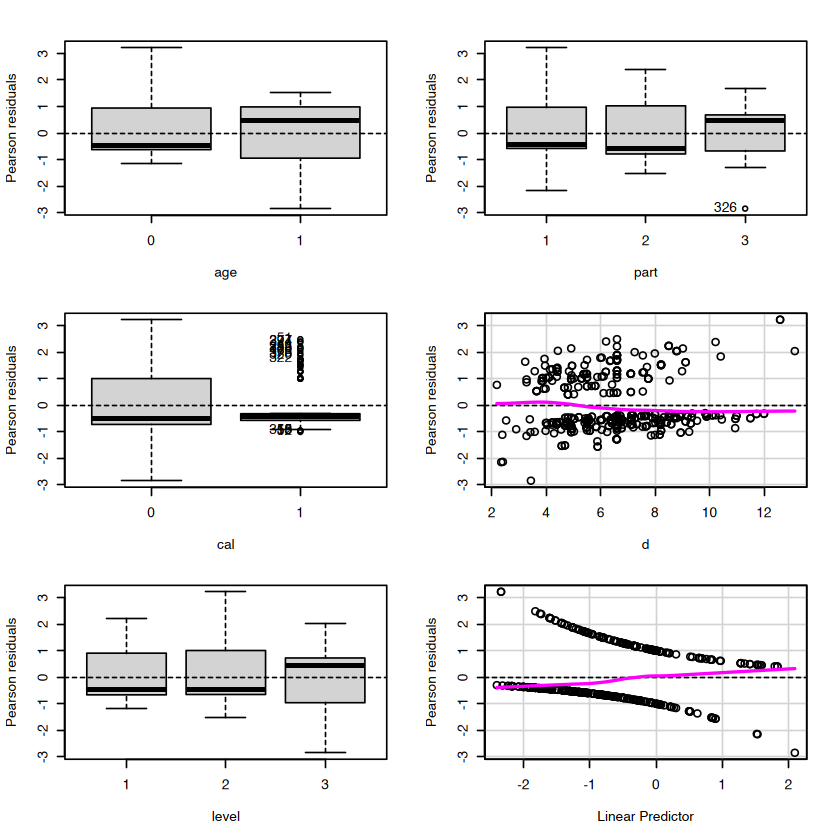

In [ ]:
residualPlots(fit)

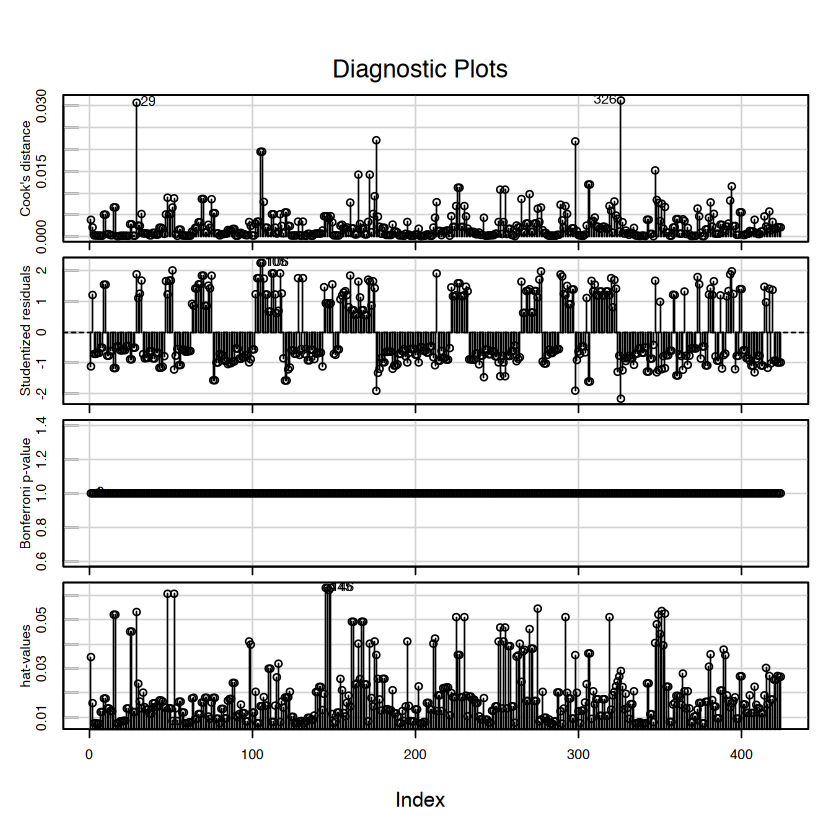

In [ ]:
influenceIndexPlot(fit)

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
29,1.8729994,0.05314900,0.030706248
105,2.2390147,0.01460128,0.019468046
106,2.2390147,0.01460128,0.019468046
145,0.9358821,0.06300274,0.004687059
146,0.9358821,0.06300274,0.004687059
326,-2.1593860,0.02899974,0.031211427


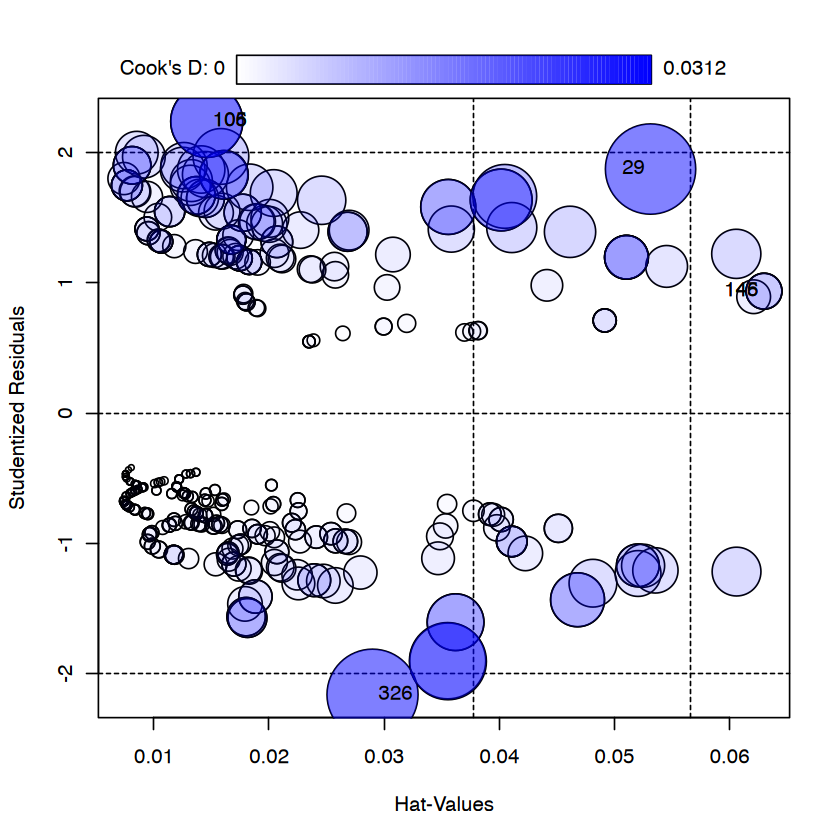

In [ ]:
influencePlot(fit)

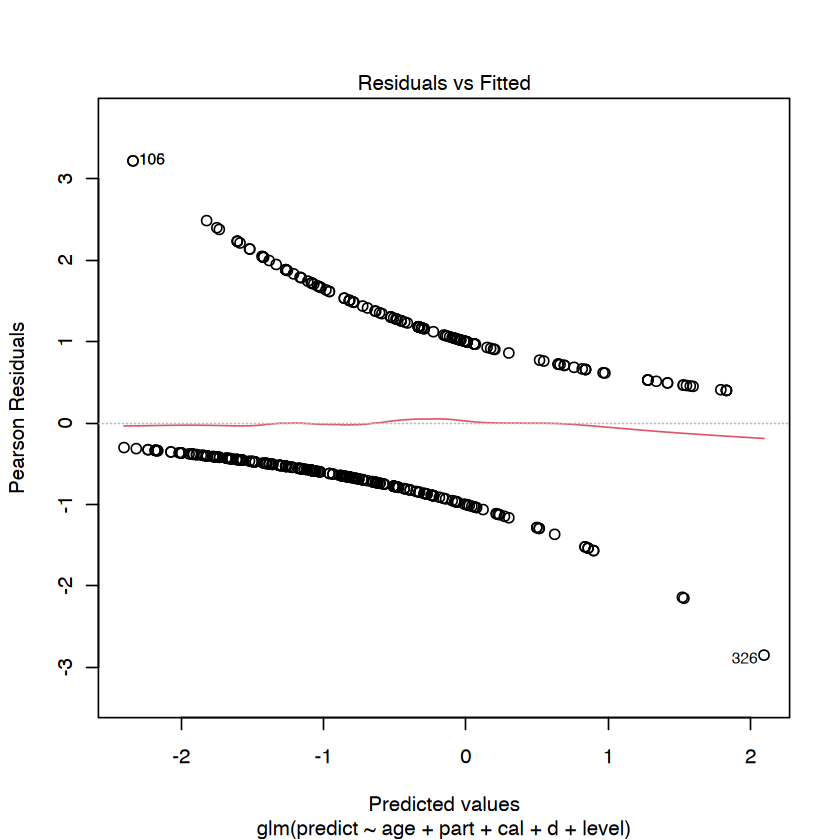

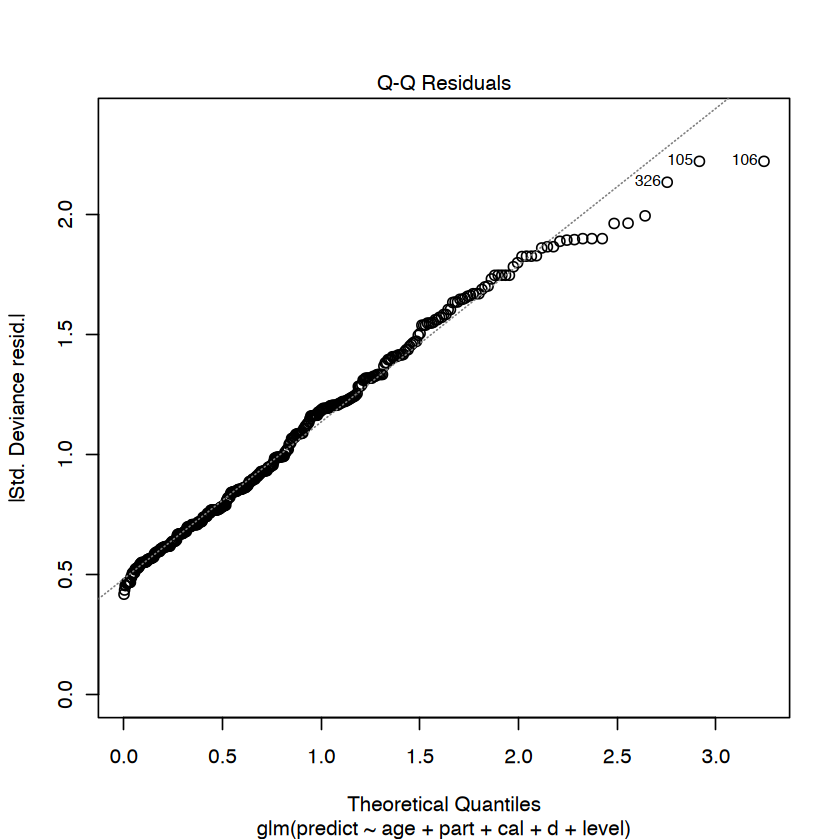

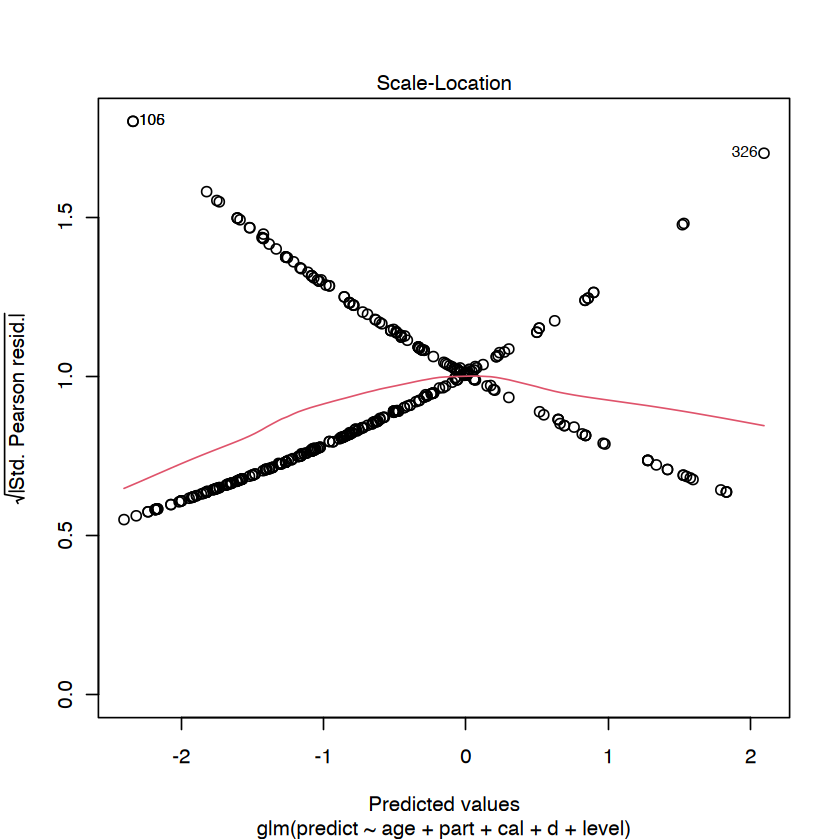

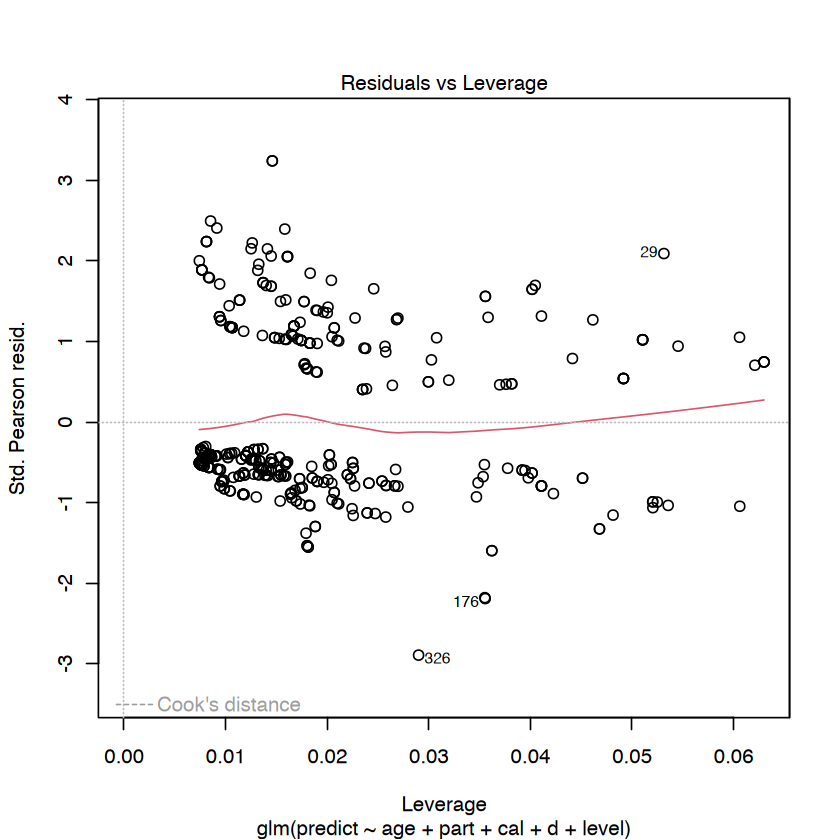

In [ ]:
plot(fit)

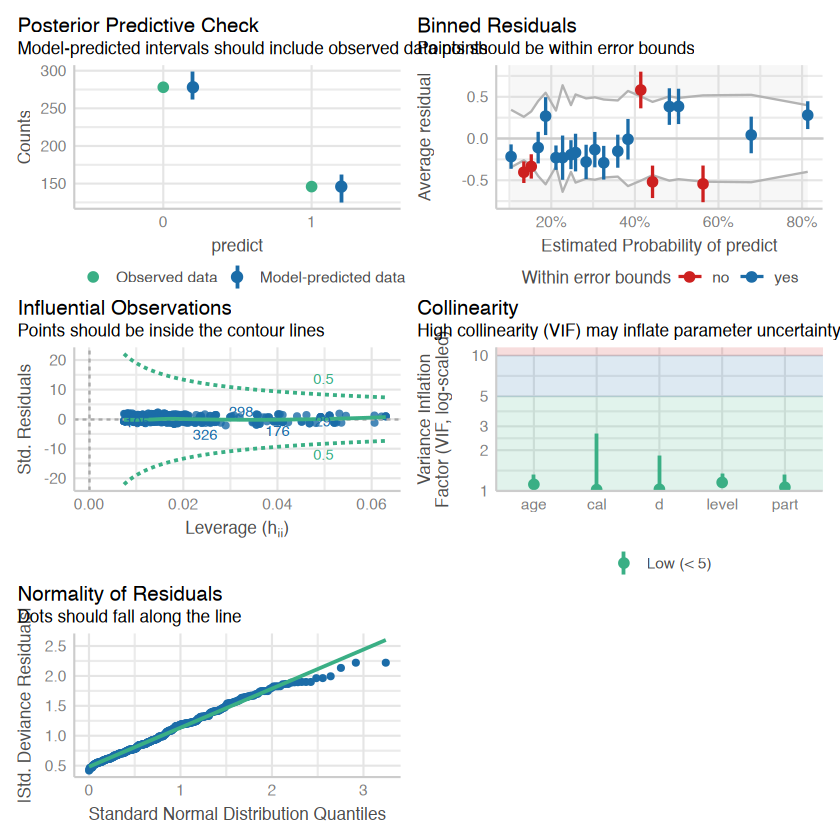

In [ ]:
library(performance)
check_model(fit, residual_type = "normal")

In [ ]:
# 以单因素分析为基础
library(broom)
# 创建df存储p值与保留与否结果
df_select <- data.frame(
  col_name = character(),
  p_value = numeric(),
  keep = logical(),
  stringsAsFactors = FALSE
)
# 阈值p值为0.05
# 其实太紧了，应该用0.1-0.2的
p_limit <- 0.05
for (i in 1:(ncol(data) - 1)) {
  col_name <- names(data)[i]
  print(col_name)

  # 使用glm函数进行Probit回归
  model <- glm(
    predict ~ data[[col_name]],
    data = data,
    family = binomial(link = "probit")
  )

  # 打印模型摘要
  print(tidy(model))

  # 提取p值
  p_value <- tidy(model)$p.value[2]  # 获取第二个系数的p值

  # 判断是否保留该变量
  keep <- p_value < p_limit

  # 将结果添加到df_select中
  df_select <- rbind(df_select, data.frame(
    col_name = col_name,
    p_value = p_value,
    keep = keep,
    stringsAsFactors = FALSE
  ))
}

# 打印df_select
print(df_select)

#   col_name      p_value  keep
# 1   gender 5.524538e-01 FALSE
# 2      age 1.795778e-07  TRUE
# 3     time 5.085391e-02 FALSE
# 4     part 7.154829e-04  TRUE
# 5    class 5.848393e-01 FALSE
# 6    modic 9.711117e-01 FALSE
# 7      cal 1.319204e-03  TRUE
# 8        d 1.523464e-04  TRUE
# 9    level 9.895184e-01 FALSE

[1] "gender"
# A tibble: 2 x 5
  term              estimate std.error statistic  p.value
  <chr>                <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)        -0.355     0.0995    -3.56  0.000367
2 data[[col_name]]1  -0.0761    0.128     -0.594 0.552   
[1] "age"
# A tibble: 2 x 5
  term              estimate std.error statistic  p.value
  <chr>                <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)         -0.590    0.0738     -8.00 1.20e-15
2 data[[col_name]]1    0.774    0.148       5.22 1.80e- 7
[1] "time"
# A tibble: 2 x 5
  term             estimate std.error statistic  p.value
  <chr>               <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)      -0.825     0.227       -3.64 0.000273
2 data[[col_name]]  0.00441   0.00226      1.95 0.0509  
[1] "part"
# A tibble: 3 x 5
  term              estimate std.error statistic  p.value
  <chr>                <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)         -0.634    0.0886     -7.16 8.06e-13
2 data[[col_name]

In [ ]:
# 建立新的回归模型
fit <- glm(predict ~ age + part + cal + d,
           data = data,
           family = binomial(link = "probit"))

# 共线性诊断
library(car)
vif(fit)  # 计算VIF

# GVIF     Df GVIF^(1/(2*Df))
# age  1.035396 1  1.017544       
# part 1.021804 2  1.005407       
# cal  1.019005 1  1.009458       
# d    1.012675 1  1.006318

,GVIF,Df,GVIF^(1/(2*Df))
age,1.035396,1,1.017544
part,1.021804,2,1.005407
cal,1.019005,1,1.009458
d,1.012675,1,1.006318


In [ ]:
# 计算 Cook 距离
cook <- cooks.distance(fit)

# 显示 Cook 距离 > 0.5 的个案编号和 Cook 值
outliers <- which(cook > 0.5)
cook_outliers <- cook[outliers]
print(data.frame(case = outliers, cook_distance = cook_outliers))

# 显示最大 Cook 距离
cat("Max Cook Distance:", max(cook), "\n")

# [1] case          cook_distance
# <0 rows> (or 0-length row.names)
# Max Cook Distance: 0.03903863

[1] case          cook_distance
<0 rows> (or 0-length row.names)
Max Cook Distance: 0.03903863 


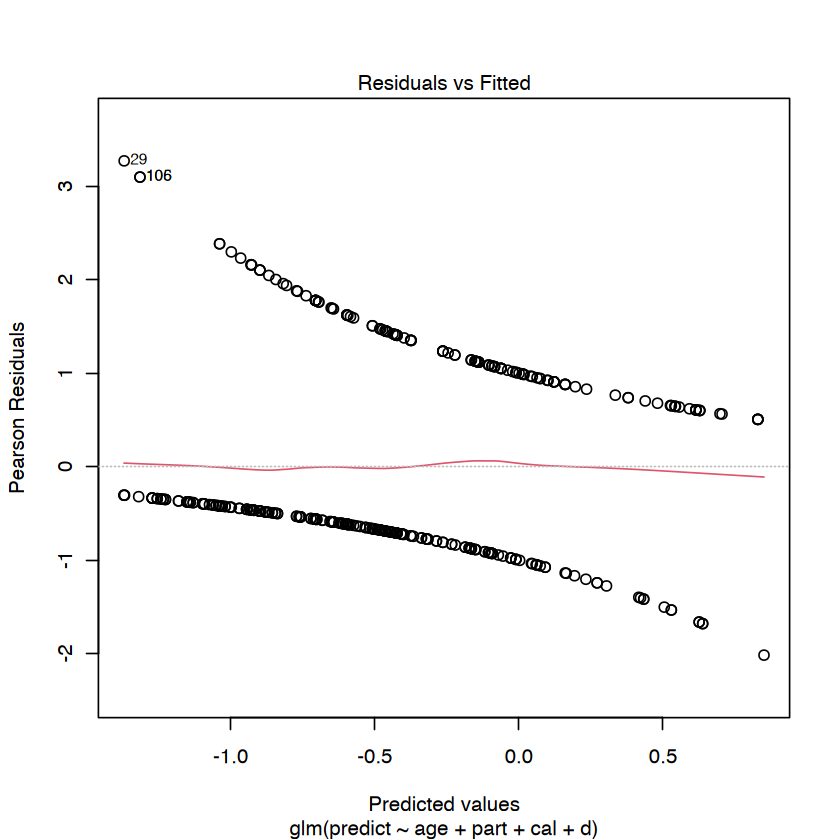

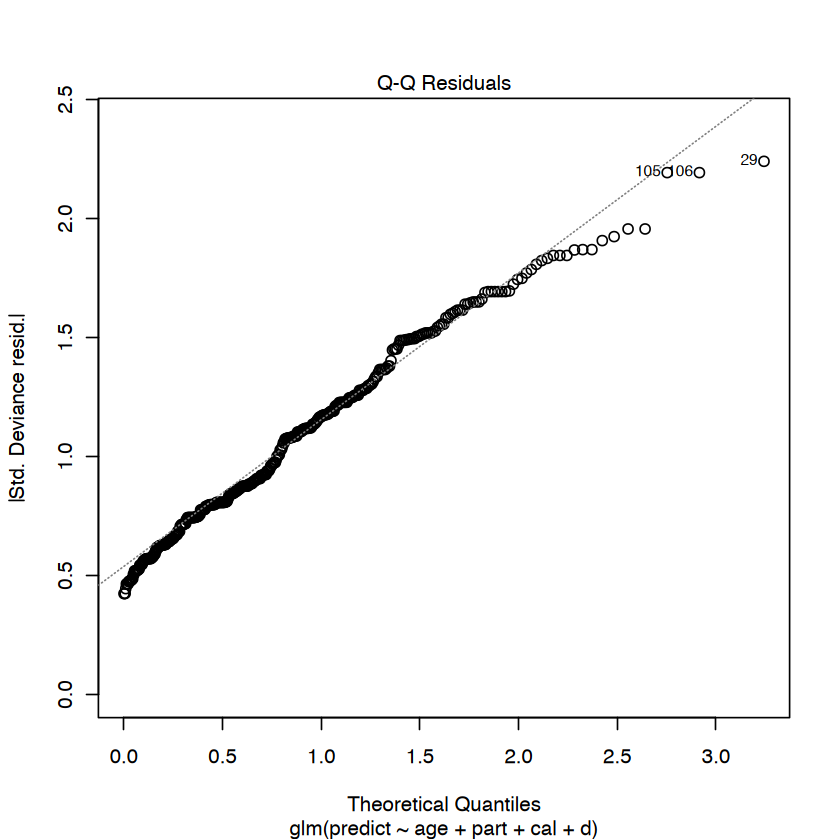

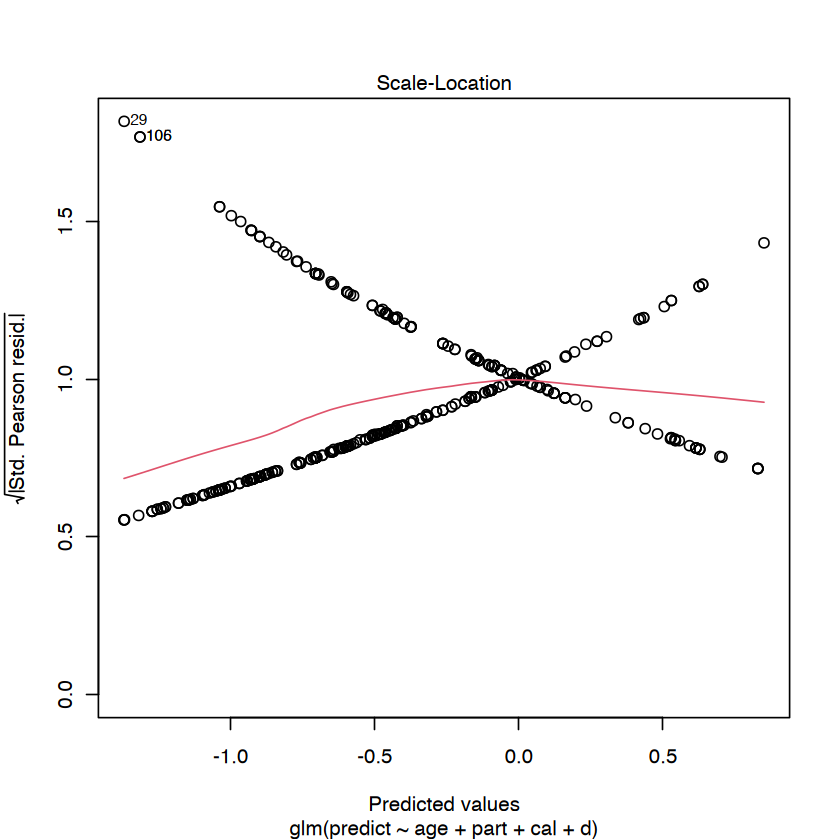

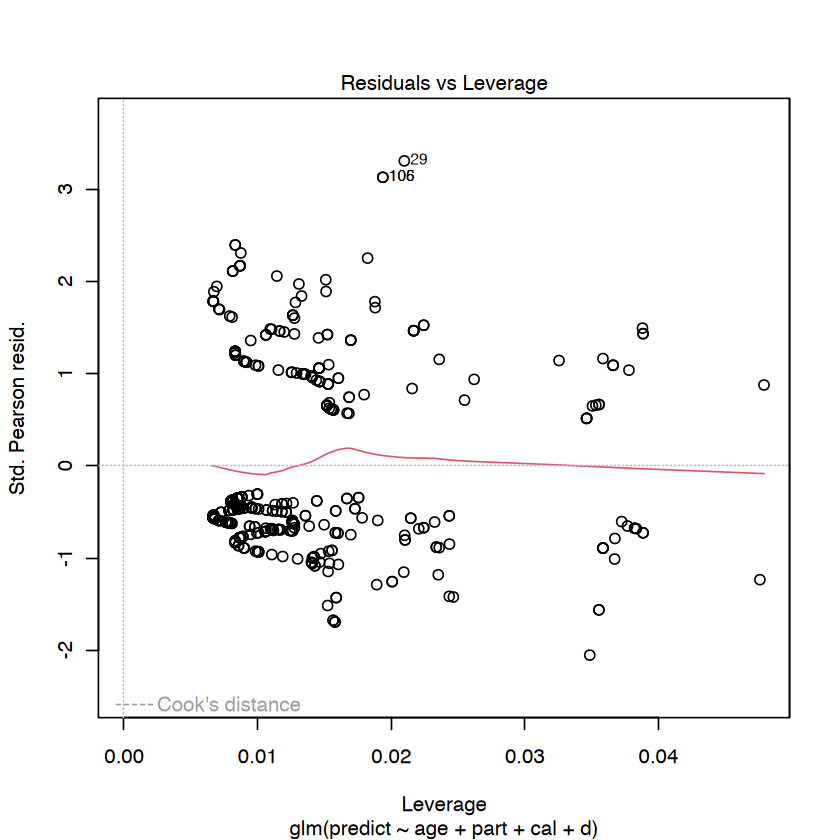

In [ ]:
plot(fit)

In [ ]:
summary(fit)

# Call:
# glm(formula = predict ~ age + part + cal + d, family = binomial(link = "probit"), 
#     data = data)

# Coefficients:
#             Estimate Std. Error z value Pr(>|z|)    
# (Intercept) -0.03336    0.26118  -0.128  0.89838    
# age1         0.69493    0.15478   4.490 7.13e-06 ***
# part2        0.44151    0.13902   3.176  0.00149 ** 
# part3        0.53935    0.24613   2.191  0.02843 *  
# cal1        -0.33314    0.14722  -2.263  0.02364 *  
# d           -0.10173    0.03575  -2.845  0.00444 ** 
# ---
# Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# (Dispersion parameter for binomial family taken to be 1)

#     Null deviance: 546.00  on 423  degrees of freedom
# Residual deviance: 488.58  on 418  degrees of freedom
# AIC: 500.58

# Number of Fisher Scoring iterations: 4


Call:
glm(formula = predict ~ age + part + cal + d, family = binomial(link = "probit"), 
    data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.03336    0.26118  -0.128  0.89838    
age1         0.69493    0.15478   4.490 7.13e-06 ***
part2        0.44151    0.13902   3.176  0.00149 ** 
part3        0.53935    0.24613   2.191  0.02843 *  
cal1        -0.33314    0.14722  -2.263  0.02364 *  
d           -0.10173    0.03575  -2.845  0.00444 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 546.00  on 423  degrees of freedom
Residual deviance: 488.58  on 418  degrees of freedom
AIC: 500.58

Number of Fisher Scoring iterations: 4


In [ ]:
tidy(fit)

# term        estimate    std.error  statistic  p.value     
# 1 (Intercept) -0.03335593 0.26117795 -0.1277134 8.983758e-01
# 2 age1         0.69493378 0.15477676  4.4899104 7.125315e-06
# 3 part2        0.44150952 0.13901943  3.1758836 1.493809e-03
# 4 part3        0.53934794 0.24612937  2.1913189 2.842872e-02
# 5 cal1        -0.33314447 0.14721735 -2.2629429 2.363921e-02
# 6 d           -0.10172751 0.03575318 -2.8452715 4.437359e-03

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.03335593,0.26117795,-0.1277134,8.983758e-01
age1,0.69493378,0.15477676,4.4899104,7.125315e-06
part2,0.44150952,0.13901943,3.1758836,1.493809e-03
part3,0.53934794,0.24612937,2.1913189,2.842872e-02
cal1,-0.33314447,0.14721735,-2.2629429,2.363921e-02
d,-0.10172751,0.03575318,-2.8452715,4.437359e-03


In [ ]:
# 手动构造似然比检验
# 计算对数似然值
loglik_full <- logLik(fit)

# 计算空模型的对数似然值
fit_null <- glm(predict ~ 1, data = data, family = binomial(link = "probit"))
loglik_null <- logLik(fit_null)

# 计算似然比检验的统计量
lr_statistic <- -2 * (loglik_null - loglik_full)

# 计算p值
p_value <- pchisq(lr_statistic, df = ncol(data) - 1, lower.tail = FALSE)

cat("Likelihood Ratio Statistic:", lr_statistic, "\n")
cat("p-value:", p_value, "\n")

if (p_value < 0.05) {
  cat("The model is statistically significant.\n")
} else {
  cat("The model is not statistically significant.\n")
}

# Likelihood Ratio Statistic: 57.42139 
# p-value: 4.196382e-09 
# The model is statistically significant.

Likelihood Ratio Statistic: 57.42139 
p-value: 4.196382e-09 
The model is statistically significant.


In [ ]:
library(glmx)
fit_het <- hetglm(
  predict ~ age + part + cal + d | age + part + cal + d,
  data = data,
  family = binomial(link = "probit")
)
summary(fit_het)

# Call:
# hetglm(formula = predict ~ age + part + cal + d | age + part + cal + 
#     d, data = data, family = binomial(link = "probit"))

# Deviance residuals:
#     Min      1Q  Median      3Q     Max 
# -1.8840 -0.8600 -0.6233  1.0874  2.1724 

# Coefficients (binomial model with probit link):
#             Estimate Std. Error z value Pr(>|z|)  
# (Intercept)   0.9006     1.4268   0.631   0.5279  
# age1          2.0580     2.3121   0.890   0.3734  
# part2         0.9578     0.5094   1.880   0.0601 .
# part3         1.5557     0.9965   1.561   0.1185  
# cal1         -0.3727     0.4978  -0.749   0.4540  
# d            -0.3776     0.3551  -1.063   0.2876  

# Latent scale model coefficients (with log link):
#       Estimate Std. Error z value Pr(>|z|)
# age1   1.59584    1.09207   1.461    0.144
# part2  0.03863    0.45944   0.084    0.933
# part3 -0.77411    0.65190  -1.187    0.235
# cal1  -0.34853    0.32318  -1.078    0.281
# d      0.11371    0.08320   1.367    0.172
# ---
# Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

# Log-likelihood: -240.6 on 11 Df
# LR test for homoscedasticity: 7.325 on 5 Df, p-value: 0.1976
# Dispersion: 1
# Number of iterations in nlminb optimization: 25


Call:
hetglm(formula = predict ~ age + part + cal + d | age + part + cal + 
    d, data = data, family = binomial(link = "probit"))

Deviance residuals:
    Min      1Q  Median      3Q     Max 
-1.8840 -0.8600 -0.6233  1.0874  2.1724 

Coefficients (binomial model with probit link):
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)   0.9006     1.4268   0.631   0.5279  
age1          2.0580     2.3121   0.890   0.3734  
part2         0.9578     0.5094   1.880   0.0601 .
part3         1.5557     0.9965   1.561   0.1185  
cal1         -0.3727     0.4978  -0.749   0.4540  
d            -0.3776     0.3551  -1.063   0.2876  

Latent scale model coefficients (with log link):
      Estimate Std. Error z value Pr(>|z|)
age1   1.59584    1.09207   1.461    0.144
part2  0.03863    0.45944   0.084    0.933
part3 -0.77411    0.65190  -1.187    0.235
cal1  -0.34853    0.32318  -1.078    0.281
d      0.11371    0.08320   1.367    0.172
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.

In [ ]:
# 稳健标准误
library(sandwich)
library(lmtest)

coeftest(fit, vcov = vcovHC)

# z test of coefficients:

#              Estimate Std. Error z value  Pr(>|z|)    
# (Intercept) -0.033356   0.289829 -0.1151  0.908375    
# age1         0.694934   0.162277  4.2824 1.849e-05 ***
# part2        0.441510   0.140931  3.1328  0.001731 ** 
# part3        0.539348   0.252385  2.1370  0.032598 *  
# cal1        -0.333144   0.148463 -2.2440  0.024835 *  
# d           -0.101728   0.042355 -2.4018  0.016315 *  
# ---
# Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


z test of coefficients:

             Estimate Std. Error z value  Pr(>|z|)    
(Intercept) -0.033356   0.289829 -0.1151  0.908375    
age1         0.694934   0.162277  4.2824 1.849e-05 ***
part2        0.441510   0.140931  3.1328  0.001731 ** 
part3        0.539348   0.252385  2.1370  0.032598 *  
cal1        -0.333144   0.148463 -2.2440  0.024835 *  
d           -0.101728   0.042355 -2.4018  0.016315 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [ ]:
# 手动计算准R2
loglik_full <- logLik(fit)
loglik_null <- logLik(fit_null)

# 计算准R2
pseudo_r2 <- 1 - (loglik_full / loglik_null)
cat("Pseudo R2:", pseudo_r2, "\n")

# Pseudo R2: 0.1051667 

Pseudo R2: 0.1051667 


In [ ]:
# 使用caret包实现混淆矩阵
library(caret)
confusionMatrix(
  as.factor(data$predict),
  as.factor(ifelse(fitted(fit) > 0.5, 1, 0))
)

# Confusion Matrix and Statistics

#           Reference
# Prediction   0   1
#          0 250  28
#          1  97  49
                                          
#                Accuracy : 0.7052          
#                  95% CI : (0.6593, 0.7482)
#     No Information Rate : 0.8184          
#     P-Value [Acc > NIR] : 1               
                                          
#                   Kappa : 0.2646          
                                          
#  Mcnemar's Test P-Value : 1.186e-09       
                                          
#             Sensitivity : 0.7205          
#             Specificity : 0.6364          
#          Pos Pred Value : 0.8993          
#          Neg Pred Value : 0.3356          
#              Prevalence : 0.8184          
#          Detection Rate : 0.5896          
#    Detection Prevalence : 0.6557          
#       Balanced Accuracy : 0.6784          
                                          
#        'Positive' Class : 0

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 250  28
         1  97  49
                                          
               Accuracy : 0.7052          
                 95% CI : (0.6593, 0.7482)
    No Information Rate : 0.8184          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2646          
                                          
 Mcnemar's Test P-Value : 1.186e-09       
                                          
            Sensitivity : 0.7205          
            Specificity : 0.6364          
         Pos Pred Value : 0.8993          
         Neg Pred Value : 0.3356          
             Prevalence : 0.8184          
         Detection Rate : 0.5896          
   Detection Prevalence : 0.6557          
      Balanced Accuracy : 0.6784          
                                          
       'Positive' Class : 0               
                              

Setting levels: control = 0, case = 1

Setting direction: controls < cases



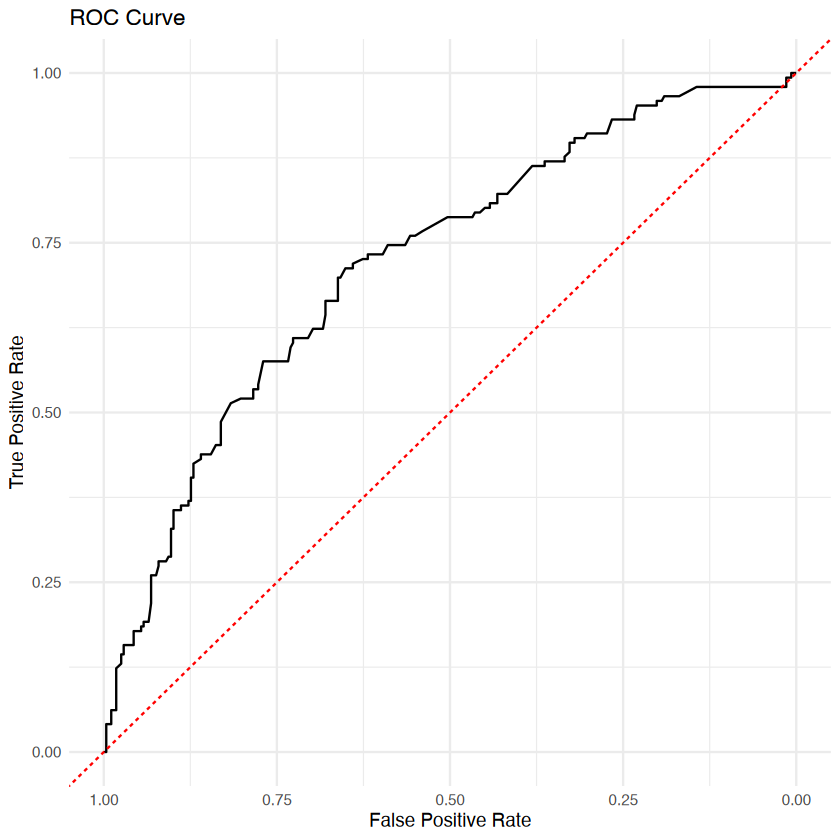

In [ ]:
# 使用ggplot2风格绘制ROC曲线
library(ggplot2)
library(pROC)
roc_curve <- roc(data$predict, fitted(fit))
ggroc(roc_curve) +
  ggtitle("ROC Curve") +
  xlab("False Positive Rate") +
  ylab("True Positive Rate") +
  theme_minimal() +
  geom_abline(slope = 1, intercept = 1, linetype = "dashed", color = "red")

In [ ]:
# 计算AUC
auc_value <- auc(roc_curve)
cat("AUC:", auc_value, "\n")

# AUC: 0.7212353 

AUC: 0.7212353 


In [ ]:
# 计算最佳截断值
best_threshold <- coords(roc_curve, "best")
cat("Best Threshold:", best_threshold$threshold, "\n")

# Best Threshold: 0.3210824 

Best Threshold: 0.3210824 


In [ ]:
# 再用最佳截断值计算混淆矩阵
confusionMatrix(
  as.factor(data$predict),
  as.factor(ifelse(fitted(fit) > best_threshold$threshold, 1, 0))
)

# Confusion Matrix and Statistics

#           Reference
# Prediction   0   1
#          0 181  97
#          1  42 104
                                          
#                Accuracy : 0.6722          
#                  95% CI : (0.6252, 0.7167)
#     No Information Rate : 0.5259          
#     P-Value [Acc > NIR] : 7.034e-10       
                                          
#                   Kappa : 0.3336          
                                          
#  Mcnemar's Test P-Value : 4.645e-06       
                                          
#             Sensitivity : 0.8117          
#             Specificity : 0.5174          
#          Pos Pred Value : 0.6511          
#          Neg Pred Value : 0.7123          
#              Prevalence : 0.5259          
#          Detection Rate : 0.4269          
#    Detection Prevalence : 0.6557          
#       Balanced Accuracy : 0.6645          
                                          
#        'Positive' Class : 0

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 181  97
         1  42 104
                                          
               Accuracy : 0.6722          
                 95% CI : (0.6252, 0.7167)
    No Information Rate : 0.5259          
    P-Value [Acc > NIR] : 7.034e-10       
                                          
                  Kappa : 0.3336          
                                          
 Mcnemar's Test P-Value : 4.645e-06       
                                          
            Sensitivity : 0.8117          
            Specificity : 0.5174          
         Pos Pred Value : 0.6511          
         Neg Pred Value : 0.7123          
             Prevalence : 0.5259          
         Detection Rate : 0.4269          
   Detection Prevalence : 0.6557          
      Balanced Accuracy : 0.6645          
                                          
       'Positive' Class : 0               
                              

In [ ]:
##拟合优度检验##
library(ResourceSelection)
hoslem.test(fit$y, fitted(fit), g = 10)

# Hosmer and Lemeshow goodness of fit (GOF) test

# data:  fit$y, fitted(fit)
# X-squared = 9.457, df = 8, p-value = 0.3052


	Hosmer and Lemeshow goodness of fit (GOF) test

data:  fit$y, fitted(fit)
X-squared = 9.457, df = 8, p-value = 0.3052


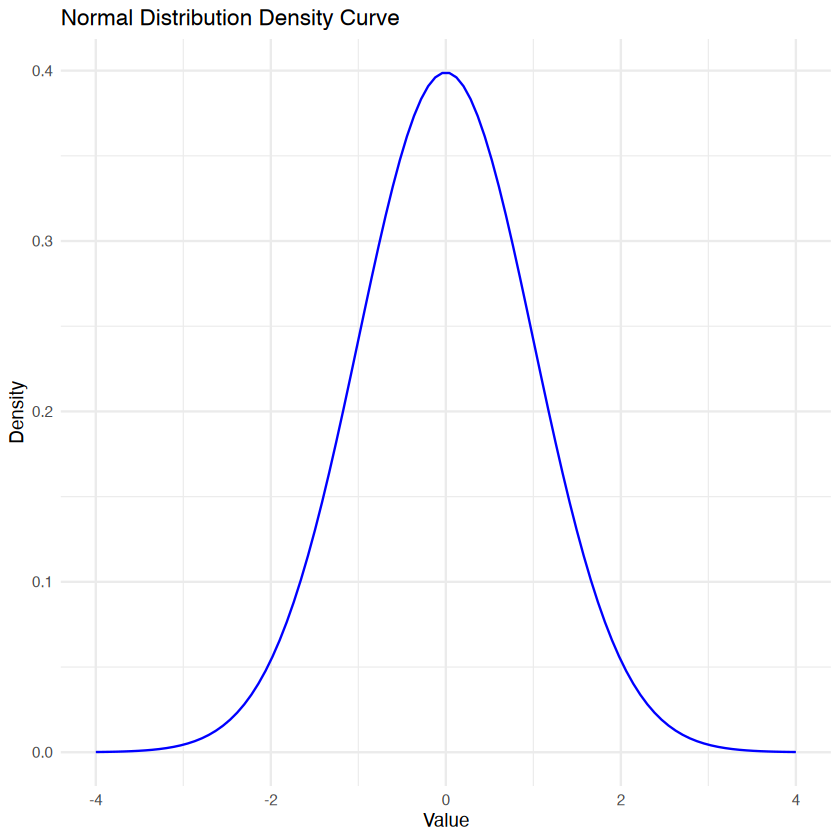

In [ ]:
# 绘制正态函数密度曲线
library(ggplot2)
data4draw <- data.frame(
  x = seq(-4, 4, length.out = 100)
)
data4draw$y <- dnorm(data4draw$x)
ggplot(data4draw, aes(x = x, y = y)) +
  geom_line(color = "blue") +
  labs(title = "Normal Distribution Density Curve",
       x = "Value",
       y = "Density") +
  theme_minimal()

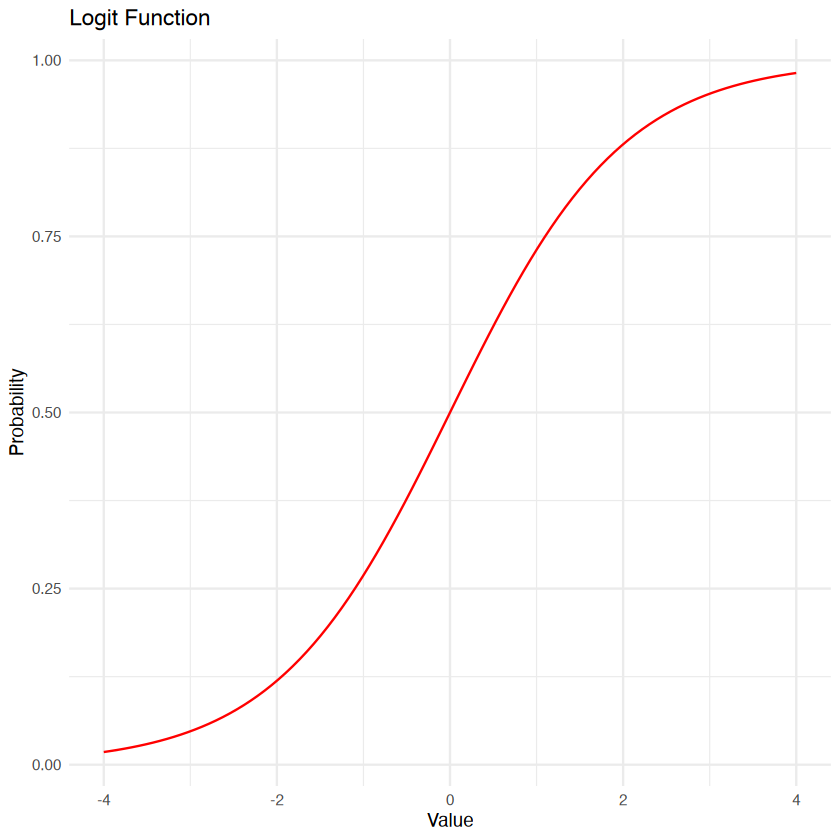

In [ ]:
# 绘制Logit函数
data4draw_logit <- data.frame(
  x = seq(-4, 4, length.out = 100)
)
data4draw_logit$y <- plogis(data4draw_logit$x)
ggplot(data4draw_logit, aes(x = x, y = y)) +
  geom_line(color = "red") +
  labs(title = "Logit Function",
       x = "Value",
       y = "Probability") +
  theme_minimal()